## Setup

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("white")

## Analysis

In [2]:
npzs = np.load('data/19597-400-200-2t-1d-msgs.npz')
msgs, preds, obs, rels, colors = (npzs[x] for x in npzs.files)

In [3]:
matches = (preds > 1) == obs
print("Exact accuracy:", matches.all(axis=1).mean())

Exact accuracy: 1.0


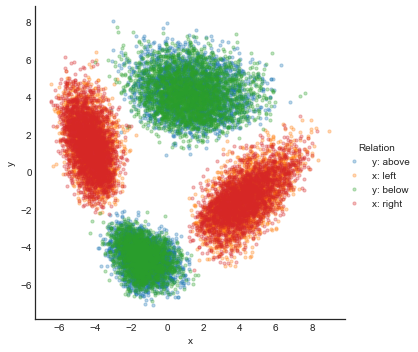

In [89]:
msgs_proj = PCA(2).fit_transform(msgs)

# Need more metadata!!
color_key = {
    'red': 'x: right',
    'blue': 'y: above',
    'orange': 'y: below',
    'green': 'x: left'
}
import pandas as pd

df = pd.DataFrame({
    'x': msgs_proj[:, 1],
    'y': msgs_proj[:, 0],
    'Relation': colors
})

g = sns.lmplot('x', 'y', data=df, fit_reg=False, hue='Relation', legend_out=True,
               scatter_kws={'s': 10, 'alpha': 0.3})
for lt in g._legend.texts:
    lt.set_text(color_key[lt.get_text()])


In [22]:
print(rels[400, :])
print(colors[400])

[0 1]
red
